In [18]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing.image import load_img, img_to_array

data_dir = "dataset/"

def get_image_mean(image):
    return np.mean(image, axis=(0, 1))


def load_image_cropped(path):
    im = load_img(path)
    width, height = im.size

    crop_size = 224
    if width < crop_size or height < crop_size:
        return im

    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))

    return im


def load_images(data_type, class_name):
    path = os.path.join(data_dir, data_type, class_name)
    images = os.listdir(path)
        
    if data_type == "train":
        return np.mean(np.array([get_image_mean(img_to_array(load_image_cropped(os.path.join(path, image)))) for image in images]), axis=0)
    
    return [img_to_array(load_image_cropped(os.path.join(path, image))) for image in images]


def create_data(data_type):
    return {
        class_name: load_images(data_type, class_name)
        for class_name in os.listdir(os.path.join(data_dir, data_type))
    }


train_data = create_data("train")
test_data = create_data("test")

In [11]:
def predict_image(image, train):
    image_mean = get_image_mean(image)
    minimal_distance = np.linalg.norm(np.array((0, 0, 0)) - np.array((255, 255, 255))) + 1
    minimal_distance_class = ""
    for class_name in train.keys():
        distance = np.linalg.norm(image_mean - train[class_name])
        if distance < minimal_distance:
            minimal_distance = distance
            minimal_distance_class = class_name
    return minimal_distance_class


def evaluate(train, test):
    total_length = 0
    correct_predictions = 0
    for class_name, image_list in test.items():
        total_length += len(image_list)
        correct_predictions += sum([1 if predict_image(image, train) == class_name else 0 for image in image_list])
    return correct_predictions / total_length


evaluate(train_data, test_data)

0.2200557103064067

# Baseline Model

Q: How does it work?
A: For each image it creates a 3D vector that is a mean of the pixel colour value of the image.
   For training it takes those vectors and creates a mean of them.
   For predicting an image it calculates the euclidean distance between the mean of the image and vector of each class and predicts the closes class.

Q: Why is it so bad and inefficient?
A: Because I am both mentally and physically ill, so instead of browsing google for ages I created my own spaghetti code.

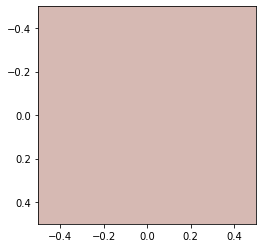

In [57]:
from matplotlib.pyplot import imshow


def show_image(path):
    im = load_img(path)
    imshow(np.asarray(im))


def show_image_cropped(path):
    im = load_image_cropped(path)
    imshow(np.asarray(im))

    
def show_mean_color(path):
    mean = get_image_mean(load_img(path))
    mean = mean.reshape(1,1,3) / 255
    imshow(mean)


path = "dataset/train/apple/Image_1.jpg"
#show_image(path)

#show_image_cropped(path)
show_mean_color(path)